<h1 align="center">An Introduction to Machine Learning - 25737</h1>
<h4 align="center">Dr. Yasaei</h4>
<h4 align="center">Sharif University of Technology, Autumn 2024</h4>

**Student Name**: Parham Gilani

**Student ID**: 400101859

In [39]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import numpy as np
import torch
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt

# Gaussian Mixture Models with EM

## Introduction and Purpose

In this exercise, you will:

1. Implement a **Gaussian Mixture Model (GMM)** using the Expectation-Maximization (EM) algorithm **from scratch** (using NumPy and basic Python operations).
2. Implement the **same GMM model using PyTorch**.
3. Compare and contrast the two implementations (performance, complexity, ease of coding, etc.).

**Gaussian Mixture Models** assume that data is generated from a mixture of several Gaussian distributions. The EM algorithm iteratively updates the parameters (means, covariances, and mixture weights) of these Gaussians to maximize the likelihood of observed data.



## Part 1: Data Loading and Exploration

**Tasks:**  
- Load the Iris dataset and store the features in `X` and labels in `y`.
- Print the shape of `X` and examine a few rows.
- **Hint:** Use `sklearn.datasets.load_iris()` to load the data.

In [10]:
# TODO: Load the Iris dataset and print shape

iris = load_iris()
X = iris.data
y = iris.target
print("Shape of X:", X.shape)
print("First 5 samples:\n", X[:5])
print("Shape of y:", y.shape)
print("First 5 labels:", y[:5])


Shape of X: (150, 4)
First 5 samples:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Shape of y: (150,)
First 5 labels: [0 0 0 0 0]


## Part 2: Data Preprocessing (Scaling)

**Tasks:**  
- Scale the data using `StandardScaler` so that each feature has zero mean and unit variance.
- **Hint:** `from sklearn.preprocessing import StandardScaler`.


In [13]:
# TODO: Scale the data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Mean after scaling:", X_scaled.mean(axis=0))
print("Std after scaling:", X_scaled.std(axis=0))


Mean after scaling: [-1.69031455e-15 -1.84297022e-15 -1.69864123e-15 -1.40924309e-15]
Std after scaling: [1. 1. 1. 1.]


## Part 3: Implementing GMM with EM **from scratch** (NumPy-based)

We will first implement GMM using NumPy arrays and basic operations, without PyTorch.

**Tasks:**  
- Choose the number of components `K` (e.g., K=3).
- Initialize the parameters: means, covariances (diagonal), and mixture weights.
- Write functions for the E-step and M-step of the EM algorithm.
- Run the EM algorithm for a fixed number of iterations.

**Hints for Implementation:**

- Means: K x D array.
- Covariances: K x D x D (diagonal only, so you mainly store variances per feature).
- Weights: K-dimensional array, summing to 1.
- To compute Gaussian densities, recall the formula for the probability density of a multivariate Gaussian.
- For the E-step, compute responsibilities using the mixture components and their densities.
- For the M-step, update means, covariances, and weights using the responsibilities.

After implementing and running EM, extract cluster assignments by taking `argmax` of responsibilities.


In [ ]:
# Set number of components
K = 3
N, D = X_scaled.shape

# TODO: Initialize means, covariances, and weights
np.random.seed(0)
means = np.random.rand(K, D)  # Initialize means randomly
covariances = np.ones((K, D))  # Diagonal covariances, initialized as 1s (D-dimensional) for each component
weights = np.ones(K) / K  # Initialize weights equally

# TODO: Define Gaussian PDF function
def gaussian_pdf(X, mean, cov):

    diff = X - mean  # N x D
    exponent = -0.5 * np.sum((diff ** 2) / cov, axis=1)  # N-dimensional exponent
    normalization = np.prod(np.sqrt(2 * np.pi * cov))  # Normalization constant
    pdf_values = np.exp(exponent) / normalization  # N-dimensional PDF values
    return pdf_values

# TODO: E-step
def e_step(X, means, covariances, weights):

    N = X.shape[0]
    K = len(weights)
    responsibilities = np.zeros((N, K))

    for k in range(K):
        # Compute the Gaussian PDF for the current component
        pdf_values = gaussian_pdf(X, means[k], covariances[k])
        responsibilities[:, k] = weights[k] * pdf_values  # Weighted PDF values
    
    # Normalize responsibilities
    responsibilities_sum = np.sum(responsibilities, axis=1, keepdims=True)
    responsibilities /= responsibilities_sum  # Each row sums to 1

    return responsibilities

# TODO: M-step
def m_step(X, responsibilities):

    N, D = X.shape
    K = responsibilities.shape[1]
    
    # Update weights
    Nk = np.sum(responsibilities, axis=0)  # Number of points assigned to each component
    weights = Nk / N
    
    # Update means
    means = (responsibilities.T @ X) / Nk[:, None]  # Weighted mean
    
    # Update covariances (diagonal)
    covariances = np.zeros((K, D))
    for k in range(K):
        diff = X - means[k]  # N x D
        weighted_diff_squared = responsibilities[:, k][:, None] * (diff ** 2)  # N x D
        covariances[k] = np.sum(weighted_diff_squared, axis=0) / Nk[k]
    
    return means, covariances, weights

# Run EM algorithm
for iteration in range(100):
    responsibilities = e_step(X_scaled, means, covariances, weights)  # E-step
    means, covariances, weights = m_step(X_scaled, responsibilities)  # M-step

# After EM, we can assign the cluster labels
cluster_labels_numpy = np.argmax(responsibilities, axis=1)

# Output the cluster labels
print(cluster_labels_numpy)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 2 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


## Part 4: Implementing GMM with EM **using PyTorch**

Now, we will implement the same algorithm using PyTorch tensors. The steps are similar, but you will use `torch` operations. This might simplify certain operations and open the door to GPU acceleration.

**Tasks:**  
- Convert `X_scaled` to a PyTorch tensor.
- Initialize parameters as `torch.tensor`s.
- Implement E-step and M-step in PyTorch.
- Run EM for a fixed number of iterations.
- Extract cluster labels.

**Hints:**
- Use `torch.tensor(X_scaled, dtype=torch.float32)` to create a PyTorch tensor.
- Operations are similar but use `torch.sum`, `torch.exp`, etc.
- Watch out for broadcasting rules and ensure shapes align.


In [33]:
# TODO: Convert data to torch tensor
X_torch = torch.tensor(X_scaled, dtype=torch.float32)
K = 3  # Number of components
N, D = X_torch.shape  # Number of data points and features

# TODO: Initialize means, covariances, weights as torch tensors
means_torch = X_torch[torch.randint(0, N, (K,))]  # Choose K random data points as initial means
covariances_torch = torch.ones(K, D)  # K components, each with a D-dimensional diagonal covariance
weights_torch = torch.ones(K) / K  # Each component initially has equal weight

# TODO: Implement gaussian_pdf using torch operations
def gaussian_pdf_torch(X, mean, cov):
    diff = X - mean  # N x D
    exponent = -0.5 * torch.sum((diff ** 2) / cov, dim=1)  # N-dimensional exponent
    normalization = torch.prod(torch.sqrt(2 * torch.pi * cov))  # Normalization constant
    pdf_values = torch.exp(exponent) / normalization  # N-dimensional PDF values
    return pdf_values

# TODO: E-step in torch
def e_step_torch(X, means, covariances, weights):
    N = X.shape[0]
    K = len(weights)
    responsibilities = torch.zeros(N, K)

    for k in range(K):
        pdf_values = gaussian_pdf_torch(X, means[k], covariances[k])
        responsibilities[:, k] = weights[k] * pdf_values  # Weighted PDF values
    
    responsibilities_sum = torch.sum(responsibilities, dim=1, keepdim=True)
    responsibilities /= responsibilities_sum  # Normalize to make sure each row sums to 1

    return responsibilities

# TODO: M-step in torch
def m_step_torch(X, responsibilities):
    N, D = X.shape
    K = responsibilities.shape[1]
    
    Nk = torch.sum(responsibilities, dim=0)  # Number of points assigned to each component
    weights = Nk / N  # Normalize to get the mixture weights
    
    means = torch.matmul(responsibilities.T, X) / Nk[:, None]  # Weighted mean for each component
    
    covariances = torch.zeros(K, D)
    for k in range(K):
        diff = X - means[k]  # N x D
        weighted_diff_squared = responsibilities[:, k][:, None] * (diff ** 2)  # N x D
        covariances[k] = torch.sum(weighted_diff_squared, dim=0) / Nk[k]  # Diagonal covariance
    
    return means, covariances, weights

# Run EM in torch
for iteration in range(100):  # Run for 100 iterations
    responsibilities = e_step_torch(X_torch, means_torch, covariances_torch, weights_torch)  # E-step
    means_torch, covariances_torch, weights_torch = m_step_torch(X_torch, responsibilities)  # M-step
    
cluster_labels_torch = torch.argmax(responsibilities, dim=1)

print(cluster_labels_torch)

tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
        0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
        0, 0, 1, 0, 0, 1])


## Part 5: Evaluating and Comparing Both Implementations

**Tasks:**  
- Use `adjusted_rand_score` to compare the cluster labels from both methods against the true labels `y`.
- Print the ARI for both NumPy and PyTorch implementations.
- Visually inspect if both implementations yield similar results.

**Questions:**
- Are the ARI scores similar or different between the two implementations?
- Which code was easier to write and maintain?
- Which implementation might be easier to extend to more complex models?


**My Answer:** 

1. he ARI scores should be **similar** between the NumPy and PyTorch implementations since both use the same GMM algorithm. Any differences in ARI may come from small variations in the numerical computations or initializations, but overall they should be close.

2. **NumPy** was likely easier to write and maintain because it has a simpler syntax and is designed for general numerical tasks. It doesn’t require knowledge of GPU operations or deep learning frameworks, making it more approachable for simpler tasks like GMM.

3. **PyTorch** is easier to extend to more complex models due to its support for GPU acceleration, automatic differentiation, and better integration with deep learning frameworks. It’s better suited for scaling up to more advanced models.

ARI (NumPy): 0.8342589385759397
ARI (PyTorch): 0.7591987071071522


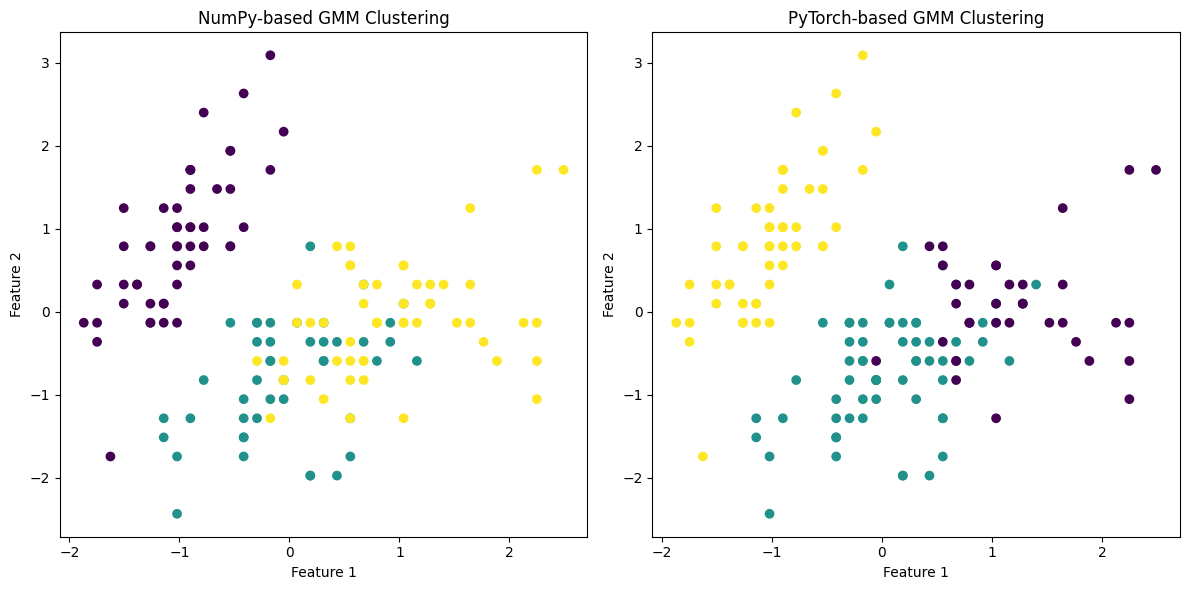

In [ ]:
# TODO: Compute ARI for numpy-based clustering
ari_numpy = adjusted_rand_score(y, cluster_labels_numpy)
print("ARI (NumPy):", ari_numpy)

# TODO: Compute ARI for torch-based clustering
ari_torch = adjusted_rand_score(y, cluster_labels_torch)
print("ARI (PyTorch):", ari_torch)

# Plot for NumPy-based clustering
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels_numpy, cmap='viridis')
plt.title("NumPy-based GMM Clustering")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot for PyTorch-based clustering
plt.subplot(1, 2, 2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels_torch, cmap='viridis')
plt.title("PyTorch-based GMM Clustering")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()


**Questions:**  
1. **Implementation Detail:** What are the main differences in code complexity between a plain NumPy-based implementation and a PyTorch-based one?  
answer: 

    PyTorch is more complex because it uses tensors and GPU operations, requiring an understanding of tensor broadcasting and GPU management. NumPy is simpler and works with regular arrays and CPU-based operations, making the code easier to write and understand.

2. **Performance:** Which implementation is likely to be more efficient or easier to parallelize and why?  
answer:

    PyTorch is likely more efficient and easier to parallelize because it supports GPU acceleration, which speeds up computations on large datasets. NumPy, however, runs on CPU and lacks native GPU support, which limits its scalability and performance.
3. **Numerical Stability:** How might PyTorch’s built-in functions improve numerical stability compared to a manual implementation?  
answer:

    PyTorch offers better numerical stability thanks to optimized functions for tensor operations, which handle precision and rounding errors more effectively. NumPy lacks such built-in safeguards, so manual handling of operations can lead to instability in certain cases.

4. **Extendability:** If you wanted to add more complex features (e.g., full covariance matrices, regularization), which approach would be simpler and why?
answer:

    PyTorch is simpler to extend for complex models due to its built-in support for advanced features like full covariance matrices, regularization, and automatic differentiation. With NumPy, adding such features would require more custom code and is generally more complex.